In [29]:
#before use, plz make sure dir val_tmp & train_tmp is empty
import json
import os
import pdb
p=pdb.set_trace
file = 'instances_val2017.json'                                                 #Grabs annotation file from PWD
cat_list=[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90]
if os.path.isdir("val_tmp") == False:
    os.mkdir("val_tmp")

with open(file) as f:
    d = json.load(f)

i = 0
del_list=[]
for annotation in d['annotations']:
    #print(d['annotations'][i]['category_id'])
    cat_id=d['annotations'][i]['category_id']
    is_group=d['annotations'][i]['iscrowd']
    if cat_id==1 :
        imageid = str(d['annotations'][i]['image_id']).zfill(12)                #This is your image name, and will become $imageid.txt
        x_coord = d['annotations'][i]['bbox'][0]                                #Grabs the bbox values, originally as [x,y,width,height]
        y_coord = d['annotations'][i]['bbox'][1]
        width = d['annotations'][i]['bbox'][2]
        height = d['annotations'][i]['bbox'][3]
        XMax = x_coord + width                                                  #We need bbox values formatted as XMin,Xmax,YMin,YMax
        XMax = round(XMax,2)                                                    #Rounded to two decimal places, in case the were to become an issue
        YMax = y_coord + height
        YMax = round(YMax,2)

        text_file = open("val_tmp/%s.txt"%imageid,"a")                           #Writes data to file within the 'export' folder
        #dirs='/home/lijiong/Github/PyTorch-YOLOv3/data/images/'+imageid+'.jpg '
        #text_file.write(dirs)
        text_file.write("%s,%s,%s,%s,%d "%(x_coord,y_coord,XMax,YMax,cat_list.index(cat_id)))
        #if cat_id-1>80:
         #   print(text_file)
        text_file.close()
    if is_group==1:
        del_list.append("val_tmp/%s.txt"%imageid)
    i = i + 1
f.close()
del_list=set(del_list)

In [30]:
for i in del_list:
    os.remove(i)

227

In [31]:
if os.path.exists("val.txt"):
    os.remove("val.txt")
with open("val.txt","a") as tot_file:
    for root, dirs, files in os.walk("val_tmp"):
        for name in files:
            with open(root+'/'+name) as f:
                for line in f:
                    dirs='/home/lijiong/Github/PyTorch-YOLOv3/data/images/val2017/'+name[0:-4]+'.jpg '
                    if dirs=='/home/lijiong/Github/PyTorch-YOLOv3/data/images/val2017/000000000285.jpg':
                        p()
                    tot_file.write(dirs)
                    tot_file.write(line+'\n')

            os.remove(root+'/'+name)
tot_file.close()

In [42]:
file = 'instances_train2017.json'                                                 #Grabs annotation file from PWD

if os.path.isdir("train_tmp") == False:
    os.mkdir("train_tmp")

with open(file) as f:
    d = json.load(f)

i = 0
del_list=[]
for annotation in d['annotations']:
    #print(d['annotations'][i]['category_id'])
    cat_id=d['annotations'][i]['category_id']
    is_group=d['annotations'][i]['iscrowd']
    if cat_id==1:
        imageid = str(d['annotations'][i]['image_id']).zfill(12)                #This is your image name, and will become $imageid.txt
        x_coord = d['annotations'][i]['bbox'][0]                                #Grabs the bbox values, originally as [x,y,width,height]
        y_coord = d['annotations'][i]['bbox'][1]
        width = d['annotations'][i]['bbox'][2]
        height = d['annotations'][i]['bbox'][3]

        XMax = x_coord + width                                                  #We need bbox values formatted as XMin,Xmax,YMin,YMax
        XMax = round(XMax,2)                                                    #Rounded to two decimal places, in case the were to become an issue
        YMax = y_coord + height
        YMax = round(YMax,2)

        text_file = open("train_tmp/%s.txt"%imageid,"a")                           #Writes data to file within the 'export' folder
        #dirs='/home/lijiong/Github/PyTorch-YOLOv3/data/images/'+imageid+'.jpg '
        #text_file.write(dirs)
        text_file.write("%s,%s,%s,%s,%d "%(x_coord,y_coord,XMax,YMax,cat_list.index(cat_id)))
        text_file.close()
    if is_group==1:
        del_list.append("train_tmp/%s.txt"%imageid)
    i = i + 1
f.close()
del_list=set(del_list)
for i in del_list:
    os.remove(i)

In [44]:
if os.path.exists("train.txt"):
    os.remove("train.txt")
with open("train.txt","a") as tot_file:
    for root, dirs, files in os.walk("train_tmp"):
        for name in files:
            with open(root+'/'+name) as f:
                for line in f:
                    dirs='/home/lijiong/Github/PyTorch-YOLOv3/data/images/train2017/'+name[0:-4]+'.jpg '
                    tot_file.write(dirs)
                    tot_file.write(line+'\n')
            os.remove(root+'/'+name)
tot_file.close()

5

In [29]:
from PIL import Image
import matplotlib.pyplot as plt
img=Image.open("/home/lijiong/Github/PyTorch-YOLOv3/data/images/val2017/000000293390.jpg")
plt.imshow(img)

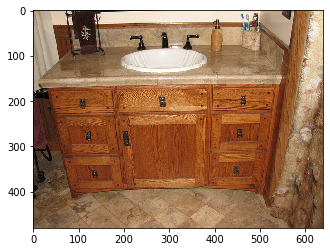

In [30]:
plt.imshow(img)

4952
36781
